### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


# pd.set_option('Display.max_rows' , None)
# pd.set_option('Display.max_columns' , None)
# pd.set_option('Display.width' , None)

##### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Churn_Modelling(1).csv')

In [3]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


#### Drop the Non significant values

In [4]:
df.drop(['RowNumber' ,'CustomerId','Surname'] , axis = 1 , inplace = True)

In [5]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### EDA

###### Check Duplicated value

In [6]:
df.duplicated().sum()

0

##### Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


##### Check the unique value as well as ambiguity value

In [8]:
for i in df.columns:
    print('*'* 20 , i , '*'*20)
    print()
    print()
    print(set(df[i].to_list()))
    print()
    print()


******************** CreditScore ********************


{350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579

### Data Preprocessing

#### 1.Handling Missing Values

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### 2.Handling Characters (Encoding)

In [11]:
df = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first = True )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.6 KB


In [13]:
#df['Gender_Male'] = df['Gender_Male'].astype('category')

In [14]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.6 KB


#### Splitting data into independent and dependent variable

In [16]:
x = df.drop('Exited' , axis = 1)

In [17]:
y = df.loc[: , 'Exited']

In [18]:
x.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [19]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

##### 4.Outliers

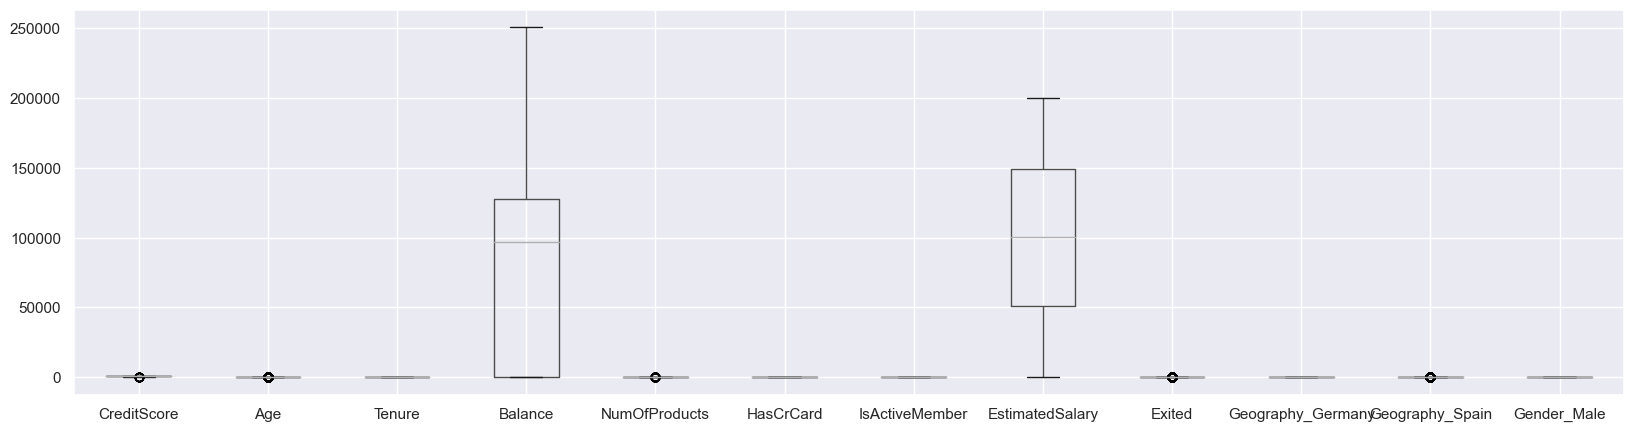

In [20]:
plt.figure(figsize = (20 ,5))
df.boxplot()
plt.show()

#### 5. Check balance data

In [21]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
def Check_data_balancing(df):
    
    minority_class = 2037
    majority_class = 7963
    
    if  minority_class * 2 <= majority_class:
        
        print('Data is Imbalance')
        
    else:
        
        print('Data is Balance')

In [23]:
Check_data_balancing(df)

Data is Imbalance


#### Instead of doing data balancing we can use startify.To split certain amount of the outcome data into train and test

##### split the data into train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 12 ,stratify = y )

In [26]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(7500, 11) (2500, 11) (7500,) (2500,)


##### Feature scaling for train data only for avoid data leakage problem

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

###### Feature scling with only x_train

In [29]:
x_train_scaled = scaler.fit_transform(x_train)

##### Its just transform the data

In [30]:
x_test_scaled = scaler.transform(x_test)

##### Heatmap : Actually it is not needed in classification problem.because its anot an assumption there.if assumption is there like no multicollinearity. that time u need to check the correlation 

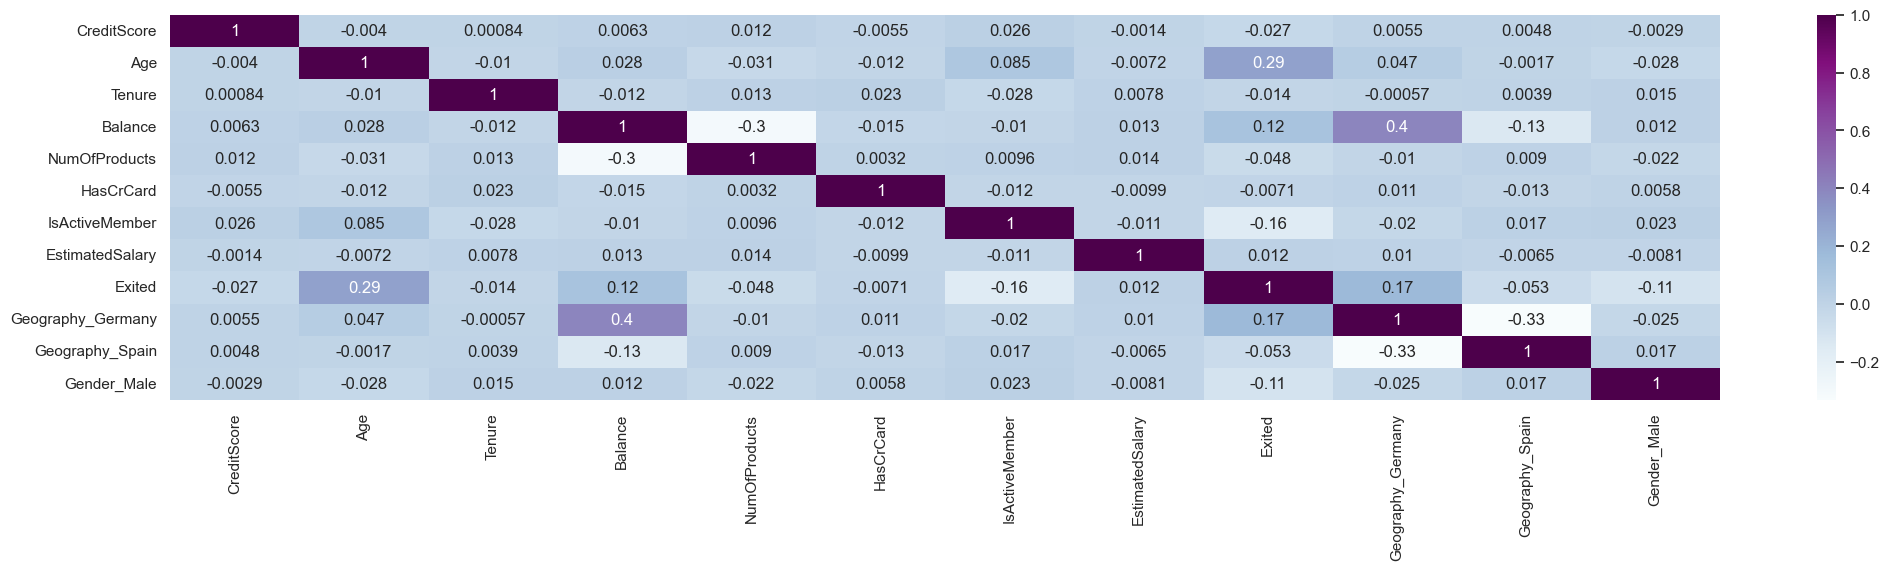

In [31]:
plt.figure(figsize = (25,5))
sns.heatmap(df.corr() ,annot = True , cbar = True  , cmap = 'BuPu')
plt.show()

##### Histplot

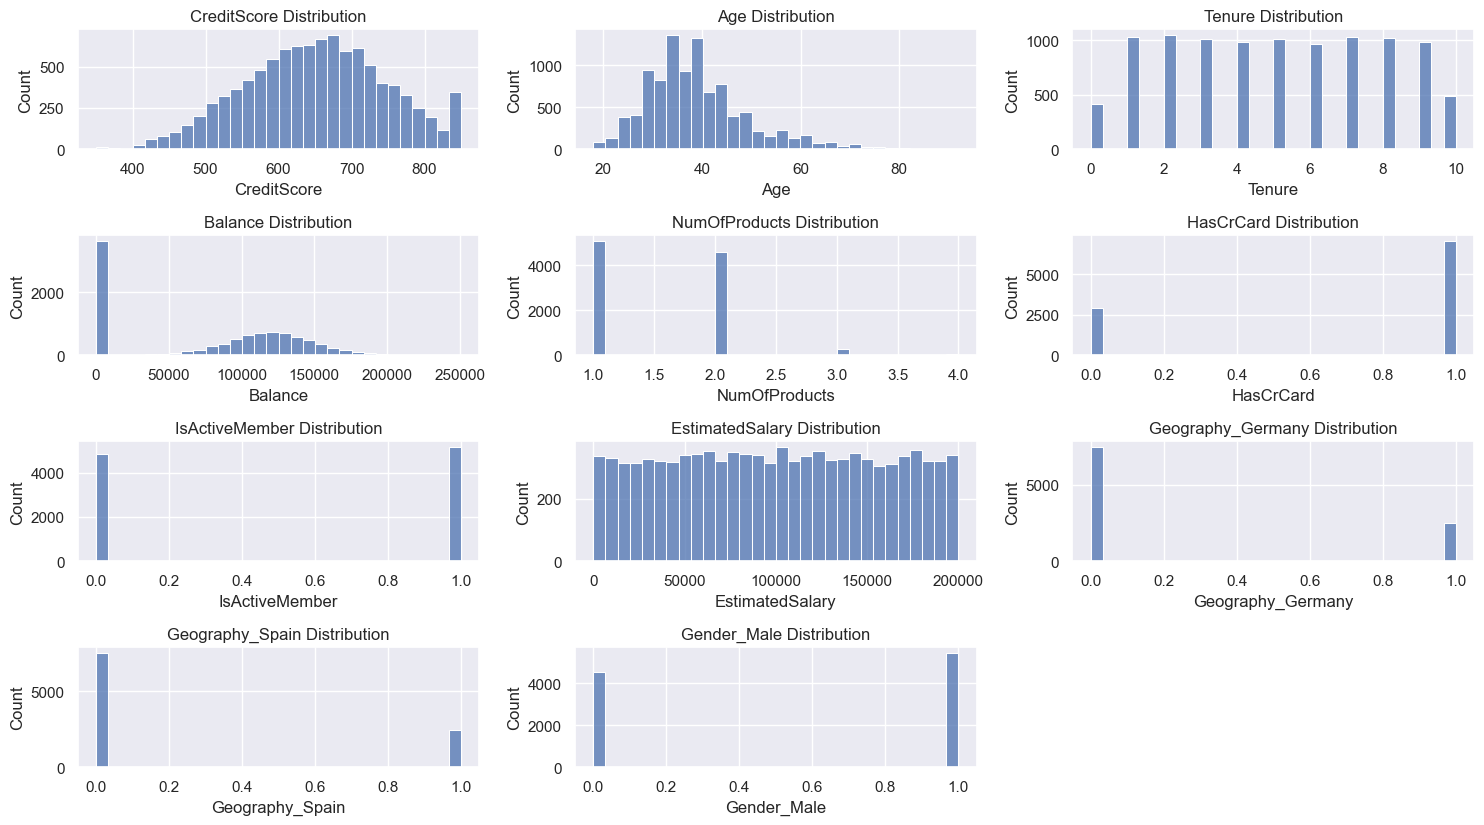

In [32]:
def distplots(df , variables ,n_rows , n_cols ):
    
    fig = plt.figure(figsize = (15,10))
    
    for i  , var_name in enumerate(variables):
        
        ax = fig.add_subplot(n_rows , n_cols , i + 1)
        
        sns.histplot(df[var_name] , bins = 30 , ax = ax)
        
        ax.set_title(var_name + ' Distribution')
        
    fig.tight_layout()
    plt.show()
        

distplots(df , x , 5 , 3)

## Building ML Models

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logit = LogisticRegression()

In [35]:
logit

LogisticRegression()

In [36]:
logit.fit(x_train , y_train)

LogisticRegression()

In [37]:
y_train_pred_lg = logit.predict(x_train)

In [38]:
y_train_pred_lg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
y_test_pred_lg = logit.predict(x_test)

In [40]:
y_test_pred_lg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Training Accuracy of Logistic

In [41]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [42]:
training_accuracy_lg = accuracy_score(y_train , y_train_pred_lg)

In [43]:
training_accuracy_lg

0.7893333333333333

In [44]:
confusion_matrix(y_train , y_train_pred_lg)

array([[5837,  135],
       [1445,   83]], dtype=int64)

In [45]:
print(classification_report(y_train , y_train_pred_lg))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5972
           1       0.38      0.05      0.10      1528

    accuracy                           0.79      7500
   macro avg       0.59      0.52      0.49      7500
weighted avg       0.72      0.79      0.72      7500



##### Testing Accuracy of Logistic

In [46]:
testing_accuracy_lg = accuracy_score(y_test , y_test_pred_lg)

In [47]:
testing_accuracy_lg

0.7932

### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
ada = AdaBoostClassifier()

In [50]:
ada

AdaBoostClassifier()

In [51]:
ada.fit(x_train , y_train)

AdaBoostClassifier()

In [52]:
y_train_pred_ada = ada.predict(x_train)
y_test_pred_ada = ada.predict(x_test)

##### Training Accuracy Ada

In [53]:
training_accuracy_ada = accuracy_score(y_train , y_train_pred_ada)

In [54]:
training_accuracy_ada

0.8578666666666667

##### Testing Accuracy Ada

In [55]:
testing_accuracy_ada = accuracy_score(y_test , y_test_pred_ada)

In [56]:
testing_accuracy_ada

0.8596

##### Confusion matrix

In [57]:
confusion_matrix(y_train , y_train_pred_ada)

array([[5701,  271],
       [ 795,  733]], dtype=int64)

In [58]:
confusion_matrix(y_test , y_test_pred_ada)

array([[1916,   75],
       [ 276,  233]], dtype=int64)

#### Classification report

In [59]:
print(classification_report(y_train , y_train_pred_ada))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5972
           1       0.73      0.48      0.58      1528

    accuracy                           0.86      7500
   macro avg       0.80      0.72      0.75      7500
weighted avg       0.85      0.86      0.85      7500



In [60]:
print(classification_report(y_test , y_test_pred_ada))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1991
           1       0.76      0.46      0.57       509

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



### Model 2 : Gradient Boost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gb = GradientBoostingClassifier()

In [63]:
gb

GradientBoostingClassifier()

In [64]:
gb.fit(x_train  , y_train)

GradientBoostingClassifier()

In [65]:
y_train_pred_gb = gb.predict(x_train)
y_test_pred_gb = gb.predict(x_test)

#### Training Accuracy GB

In [66]:
training_accuracy_gb = accuracy_score(y_train , y_train_pred_gb)

In [67]:
training_accuracy_gb

0.8757333333333334

##### Testing Accuracy GB

In [68]:
testing_accuracy_gb = accuracy_score(y_test , y_test_pred_gb)

In [69]:
testing_accuracy_gb

0.8612

In [70]:
print(classification_report(y_train , y_train_pred_gb))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5972
           1       0.81      0.51      0.63      1528

    accuracy                           0.88      7500
   macro avg       0.85      0.74      0.78      7500
weighted avg       0.87      0.88      0.86      7500



In [71]:
print(classification_report(y_test , y_test_pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.47      0.58       509

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [72]:
confusion_matrix(y_train , y_train_pred_gb)

array([[5790,  182],
       [ 750,  778]], dtype=int64)

In [73]:
confusion_matrix(y_test , y_test_pred_gb)

array([[1915,   76],
       [ 271,  238]], dtype=int64)

### Model : 3 :  XGBOOST

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb = XGBClassifier()

In [76]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

In [79]:
training_accuracy_xgb = accuracy_score(y_train , y_train_pred_xgb)

In [80]:
training_accuracy_xgb

0.962

In [81]:
Testing_accuracy_xgb = accuracy_score(y_test , y_test_pred_xgb)

In [82]:
Testing_accuracy_xgb

0.8488

In [83]:
print(classification_report(y_train , y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5972
           1       0.97      0.84      0.90      1528

    accuracy                           0.96      7500
   macro avg       0.96      0.92      0.94      7500
weighted avg       0.96      0.96      0.96      7500



In [84]:
print(classification_report(y_test , y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1991
           1       0.69      0.47      0.56       509

    accuracy                           0.85      2500
   macro avg       0.78      0.71      0.73      2500
weighted avg       0.84      0.85      0.84      2500



### K Fold for xgboost

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
cv_xgb = cross_val_score(xgb , x_train , y_train , cv = 10)

In [87]:
cv_xgb

array([0.852     , 0.85333333, 0.86266667, 0.82933333, 0.84933333,
       0.84266667, 0.848     , 0.87333333, 0.844     , 0.86533333])

In [88]:
updated_training_accuracy_xgb = cv_xgb.mean()

In [89]:
updated_training_accuracy_xgb

0.8520000000000001

In [90]:
Testing_accuracy_xgb

0.8488

### Now Its No overfite the model

### Model No : 4 : BaggingClassifier

In [91]:
from sklearn.ensemble import BaggingClassifier

In [92]:
bg = BaggingClassifier()

In [93]:
bg

BaggingClassifier()

In [94]:
bg.fit(x_train , y_train)

BaggingClassifier()

In [95]:
y_train_pred_bg = bg.predict(x_train)

In [96]:
y_train_pred_bg

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [97]:
y_test_pred_bg = bg.predict(x_test)

In [98]:
y_test_pred_bg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
Training_accuracy_bg = accuracy_score(y_train , y_train_pred_bg)
Training_accuracy_bg

0.9841333333333333

In [100]:
Testing_accuracy_bg = accuracy_score(y_test , y_test_pred_bg)
Testing_accuracy_bg

0.858

In [101]:
print(classification_report(y_train , y_train_pred_bg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5972
           1       0.99      0.93      0.96      1528

    accuracy                           0.98      7500
   macro avg       0.99      0.96      0.97      7500
weighted avg       0.98      0.98      0.98      7500



In [102]:
print(classification_report(y_test , y_test_pred_bg))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1991
           1       0.73      0.48      0.58       509

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [103]:
cv_bg = cross_val_score(bg  , x_train , y_train , cv = 10)

In [104]:
cv_bg

array([0.84933333, 0.84533333, 0.864     , 0.83066667, 0.83333333,
       0.85333333, 0.86533333, 0.85466667, 0.81466667, 0.864     ])

In [105]:
updated_training_accuracy_bg = cv_bg.mean()

In [106]:
updated_training_accuracy_bg

0.8474666666666666

In [107]:
Testing_accuracy_bg

0.858

### Now No Overfit the model

### Model 5 : RandomForestClassifier

#### Always first preference to this model in classification or regression 

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier()

In [110]:
rf.fit(x_train , y_train)

RandomForestClassifier()

In [111]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

In [112]:
training_accuracy_rf = accuracy_score(y_train , y_train_pred_rf)
training_accuracy_rf

1.0

In [113]:
testing_accuracy_rf = accuracy_score(y_test , y_test_pred_rf)
testing_accuracy_rf

0.8616

In [114]:
print(classification_report(y_train , y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1528

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [115]:
print(classification_report(y_test , y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.47      0.58       509

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500



### K Fold for RandomForest

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
cv_rf =  cross_val_score(rf , x_train , y_train , cv = 10)

In [118]:
cv_rf

array([0.864     , 0.86133333, 0.86266667, 0.83333333, 0.844     ,
       0.85733333, 0.86666667, 0.87066667, 0.84933333, 0.87733333])

In [119]:
updated_training_accuracy_rf = cv_rf.mean()

In [120]:
updated_training_accuracy_rf

0.8586666666666666

In [121]:
testing_accuracy_rf

0.8616

### Now no overfit the model

## Note : Boosting is for handling high bias problem and Bagging is for handling high variance problem

## Model 6 : K Nearest Neighbours 

In [122]:
from sklearn.neighbors import KNeighborsClassifier

#### Calculate K value / n_neighbors value by error rate.where is less error this value should be k

In [123]:
error_rate = []
#k = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled , y_train)
    y_train_pred_knn = knn.predict(x_train_scaled)
    error_rate.append(np.mean(y_train_pred_knn != y_train))
    #k.append(i)

In [124]:
print(error_rate)

[0.0, 0.1084, 0.1048, 0.12986666666666666, 0.1268, 0.13946666666666666, 0.1356, 0.1464, 0.14213333333333333, 0.14786666666666667, 0.14666666666666667, 0.15106666666666665, 0.1472, 0.152, 0.15026666666666666, 0.1528, 0.1496, 0.15386666666666668, 0.15186666666666668, 0.1556, 0.15493333333333334, 0.16066666666666668, 0.1568, 0.16133333333333333, 0.1584, 0.162, 0.15853333333333333, 0.1624, 0.1608]


##### Insights : Less error is always better 

##### Error rate plot 

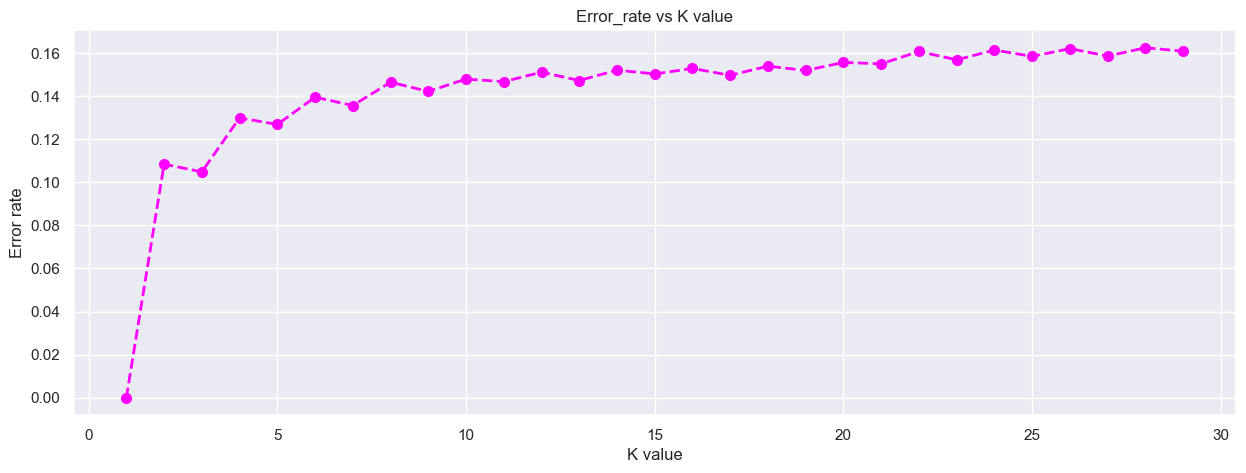

In [125]:
plt.figure(figsize = (15 , 5))
plt.plot(range(1,30) , error_rate , color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=7)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Error_rate vs K value')
plt.show()

#### Insights : 0 is the Less error so k is 1 here

### calculate k value / n_neighbors for test data

In [126]:
error_rate_test = []
#k_list = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled , y_train)
    y_test_pred_knn = knn.predict(x_test_scaled)
    error_rate_test.append(np.mean(y_test_pred_knn != y_test))
    #k_list.append(i)

In [127]:
print(error_rate_test)

[0.206, 0.1808, 0.188, 0.1748, 0.1748, 0.1752, 0.1776, 0.1796, 0.1784, 0.1772, 0.1736, 0.1796, 0.1752, 0.1768, 0.174, 0.1736, 0.1712, 0.1736, 0.172, 0.1744, 0.1736, 0.174, 0.1744, 0.1756, 0.172, 0.1744, 0.1724, 0.1756, 0.1748]


In [128]:
#print(k_list)

## Plot Error rate of test data and selection of k value

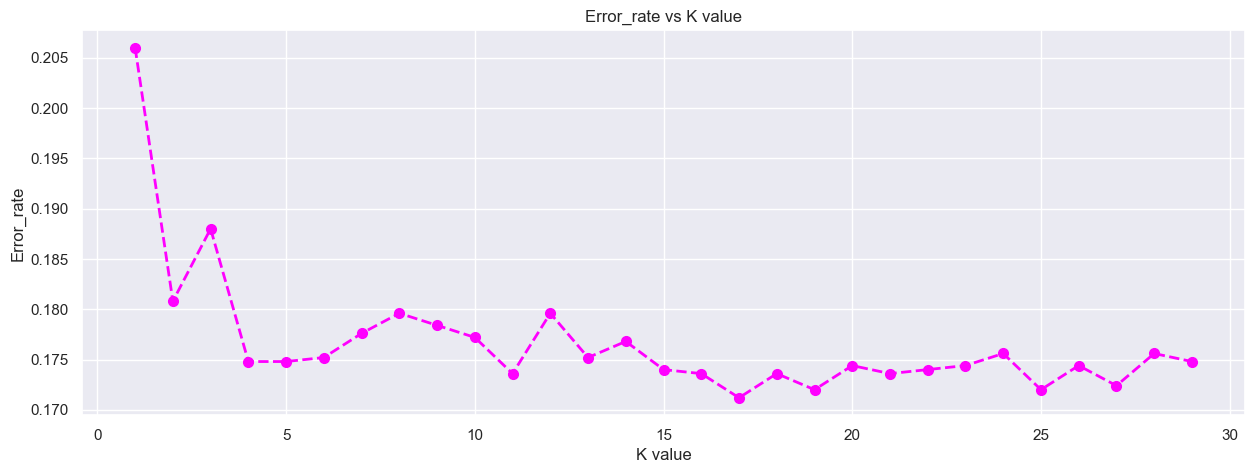

In [129]:
plt.figure(figsize = (15,5))
plt.plot(range(1,30), error_rate_test, color='magenta', marker='o', linestyle='dashed', linewidth=2, markersize=7)
plt.xlabel('K value')
plt.ylabel('Error_rate')
plt.title('Error_rate vs K value')
plt.show()

### Again Build the model on basis of New K value 

#### sir says 17 because it is odd number

In [130]:
knn = KNeighborsClassifier(n_neighbors = 17)

In [131]:
knn

KNeighborsClassifier(n_neighbors=17)

In [132]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=17)

In [133]:
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)

##### Training Accuracy of KNN

In [134]:
Training_accuracy_knn = accuracy_score(y_train , y_train_pred_knn)

In [135]:
Training_accuracy_knn

0.7988

In [136]:
Testing_accuracy_knn = accuracy_score(y_test , y_test_pred_knn)

In [137]:
Testing_accuracy_knn

0.7952

In [138]:
print(classification_report(y_train , y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5972
           1       0.63      0.03      0.06      1528

    accuracy                           0.80      7500
   macro avg       0.71      0.51      0.47      7500
weighted avg       0.77      0.80      0.72      7500



In [139]:
print(classification_report(y_test , y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1991
           1       0.41      0.01      0.03       509

    accuracy                           0.80      2500
   macro avg       0.60      0.50      0.46      2500
weighted avg       0.72      0.80      0.71      2500



## Voting Classifier

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [148]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = KNeighborsClassifier()
clf6 = BaggingClassifier()
clf7 = XGBClassifier()
clf8 = GradientBoostingClassifier()

In [149]:
estimator = [('lr' , clf1) , ('dt' , clf2) , ('rf' , clf3) , ('ada' , clf4) , ('knn' , clf5) , ('bg' , clf6) , ('xgb' , clf7) , ('gb' , clf8)]

In [150]:
estimator

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('rf', RandomForestClassifier()),
 ('ada', AdaBoostClassifier()),
 ('knn', KNeighborsClassifier()),
 ('bg', BaggingClassifier()),
 ('xgb',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('gb', Grad

### How to be build Voting model

###### You have to build cross val on all models and take its mean value that is your accuracy of all model

#### This is the code for to check just accuracies of multiple models

In [181]:
for i in estimator:
    
    #(i[1]) : Model
    Individual_accuracy = cross_val_score(i[1] , x_train , y_train , cv = 10 , scoring = 'accuracy')
    #print(f'{i[0]} : {np.mean(voting_accuracy)}')
    print('Avg accuracies of' ,i[0] ,'is' , ':' , np.round(np.mean(Individual_accuracy) , 2))

Avg accuracies of lr is : 0.79
Avg accuracies of dt is : 0.8
Avg accuracies of rf is : 0.86
Avg accuracies of ada is : 0.86
Avg accuracies of knn is : 0.76
Avg accuracies of bg is : 0.85
Avg accuracies of xgb is : 0.85
Avg accuracies of gb is : 0.86


##### Insights : we get indidual accuracies of it by cross_val_score

###### we are using voting approach when accuracies of models should be less tan 70 % and greater than 51 %. Here we doing for practice purpose

##### Import Voting Classifier

In [162]:
from sklearn.ensemble import VotingClassifier

In [175]:
for i in estimator:
    print(i[1])

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
KNeighborsClassifier()
BaggingClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
GradientBoostingClassifier()


##### It can take multiple models and build final model like it take 8 models here

In [182]:
vc = VotingClassifier(estimator , voting = 'hard')

In [183]:
vc

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('bg', BaggingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=Non...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gb', GradientBoostingClassifier())])

#### Again Build cross val score

In [184]:
cv_voting = cross_val_score(vc , x_train , y_train , cv = 10 , scoring = 'accuracy')

In [185]:
cv_voting

array([0.85733333, 0.86      , 0.87466667, 0.84      , 0.84      ,
       0.852     , 0.86      , 0.872     , 0.852     , 0.87733333])

#### Average accuracy of voting

In [186]:
Accuracy_voting = cv_voting.mean()

In [187]:
Accuracy_voting

0.8585333333333333

##### we always trust on voting model . Its is giving near about 86 % accuacy and RandomForest and adaboost and xgboost also give same that.  Here we get 86 % by combining different model with ensemble models(rf , ada , xg)

### Stacking

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [190]:
from sklearn.ensemble import StackingClassifier

In [191]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = KNeighborsClassifier()
clf6 = BaggingClassifier()
clf7 = XGBClassifier()
clf8 = GradientBoostingClassifier()

In [192]:
estimator = [('lr' , clf1 ) , ('dt' , clf2) , ('rf' ,clf3) , ('ada' , clf4) , ('knn' , clf5) , ('bg' , clf6) , ('xgb' , clf7) , ('gb' , clf8)]

In [193]:
print(estimator)

[('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('ada', AdaBoostClassifier()), ('knn', KNeighborsClassifier()), ('bg', BaggingClassifier()), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('gb', GradientBoostingClassifier())]


#### Final estimator is the base model  or first model.Here base model is Logit. I am comparing logitic with other estimators

In [202]:
stack = StackingClassifier(estimators = estimator , final_estimator = LogisticRegression() , cv = 10) 

In [203]:
stack

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('bg', BaggingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              de...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

#### Fit the stacking model

In [204]:
stack.fit(x_train , y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('bg', BaggingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              de...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

#### output Prediction of  stacking model

In [205]:
y_train_pred_stack = stack.predict(x_train)
y_test_pred_stack = stack.predict(x_test)

##### Accuracy of training model of stack

In [207]:
Training_accuracy_stack = accuracy_score(y_train , y_train_pred_stack)

In [208]:
Training_accuracy_stack

0.9190666666666667

##### Accuracy of testing model of stack

In [211]:
Testing_accuracy_stack = accuracy_score(y_test , y_test_pred_stack)

In [212]:
Testing_accuracy_stack

0.8656

##### Insights : we get very best model by stacking and it is accurate also means not overfitting and not underfitting

#### Individual accuracies

In [213]:
for i in estimator:
    
    #(i[1]) : Model
    Individual_accuracy = cross_val_score(i[1] , x_train , y_train , cv = 10 , scoring = 'accuracy')
    #print(f'{i[0]} : {np.mean(voting_accuracy)}')
    print('Avg accuracies of' ,i[0] ,'is' , ':' , np.round(np.mean(Individual_accuracy) , 2))

Avg accuracies of lr is : 0.79
Avg accuracies of dt is : 0.8
Avg accuracies of rf is : 0.86
Avg accuracies of ada is : 0.86
Avg accuracies of knn is : 0.76
Avg accuracies of bg is : 0.85
Avg accuracies of xgb is : 0.85
Avg accuracies of gb is : 0.86
